In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
def create_sequences(data, target, time_steps=5):
    Xs, ys = [], []
    for i in range(len(data) - time_steps):
        Xs.append(data[i:(i + time_steps)])
        ys.append(target[i + time_steps])
    return np.array(Xs), np.array(ys)

In [7]:
def plotHistory(window, history):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
    axes = axes.flatten()
    
    ax0 = axes[0]
    # Plot training & validation accuracy values
    ax0.plot(history.history['accuracy'])
    ax0.plot(history.history['val_accuracy'])
    ax0.set_title('Model accuracy')
    ax0.set_ylabel('Accuracy')
    ax0.set_xlabel('Epoch')

    ax1 = axes[1]
    # Plot training & validation loss values
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    
    fig.suptitle(f'Window Size = {window}', fontweight='bold')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

2024-03-25 18:44:42.107330: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-25 18:44:42.107381: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-25 18:44:42.107416: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mario-planck): /proc/driver/nvidia/version does not exist
2024-03-25 18:44:42.107849: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Results using a window of 5 games


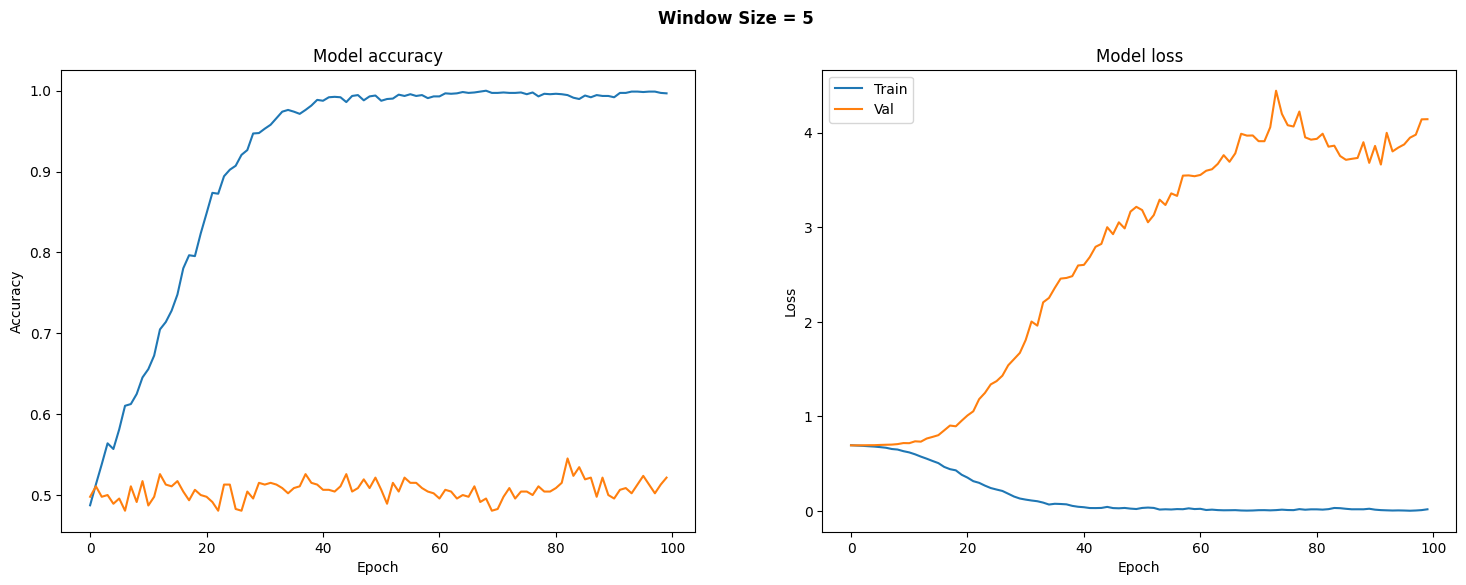

Results using a window of 10 games


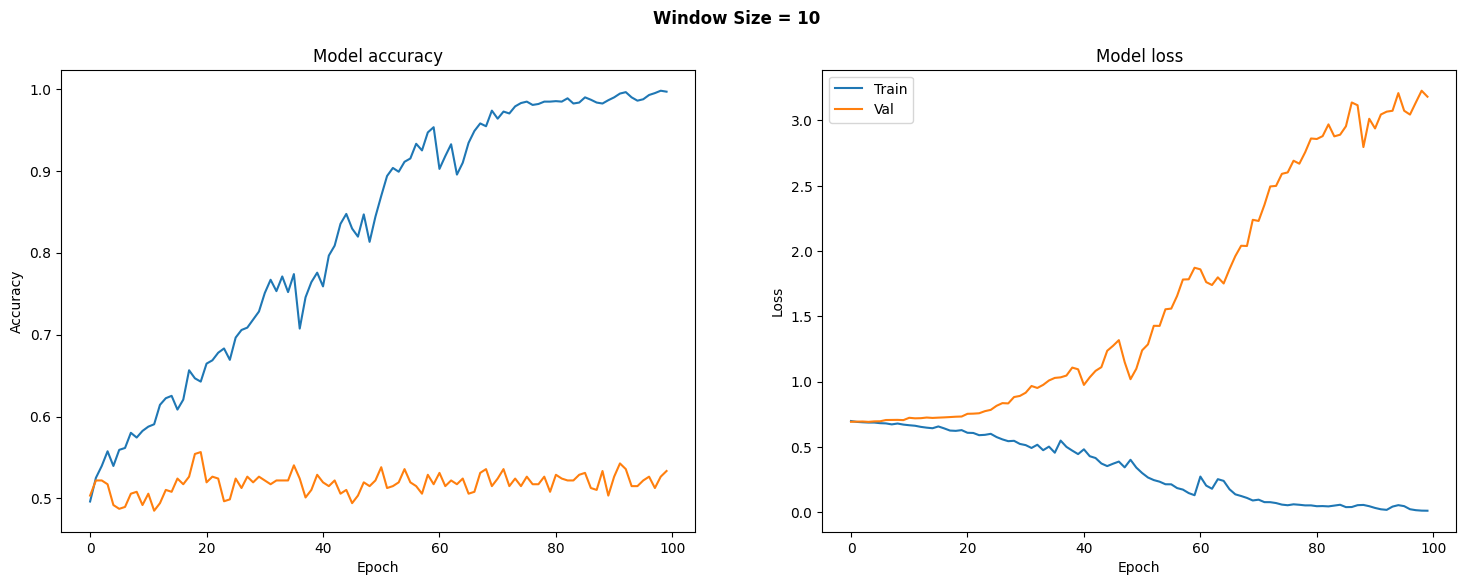

Results using a window of 15 games


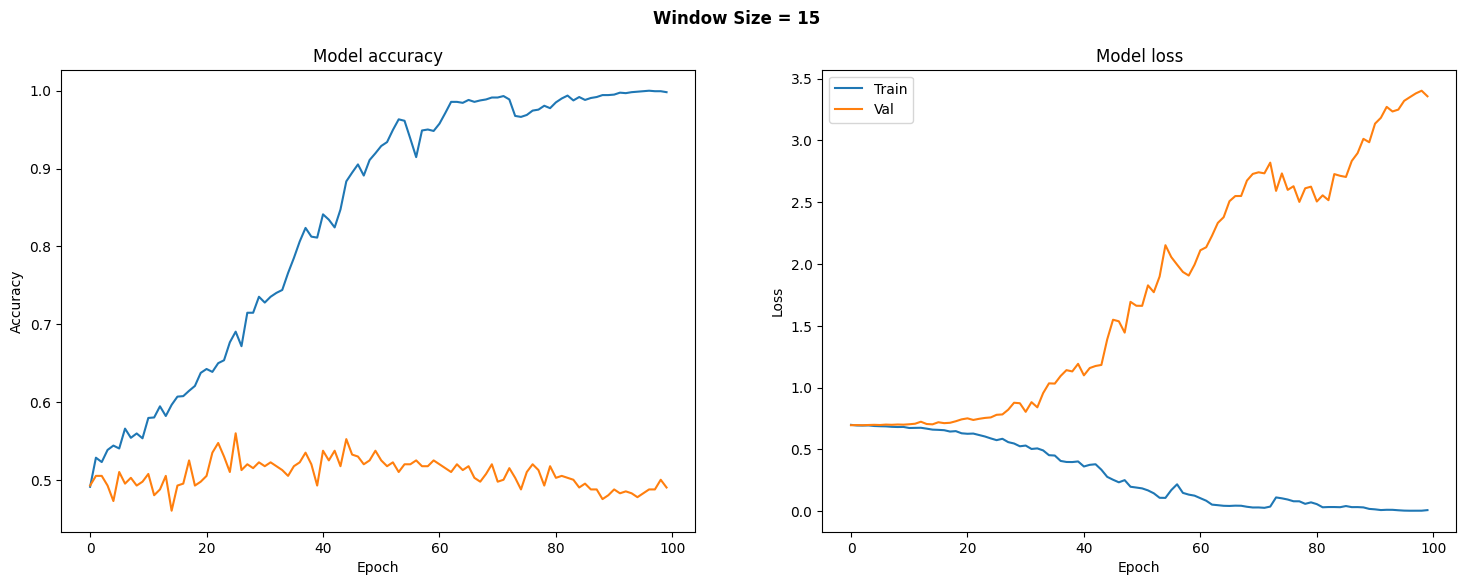

Results using a window of 18 games


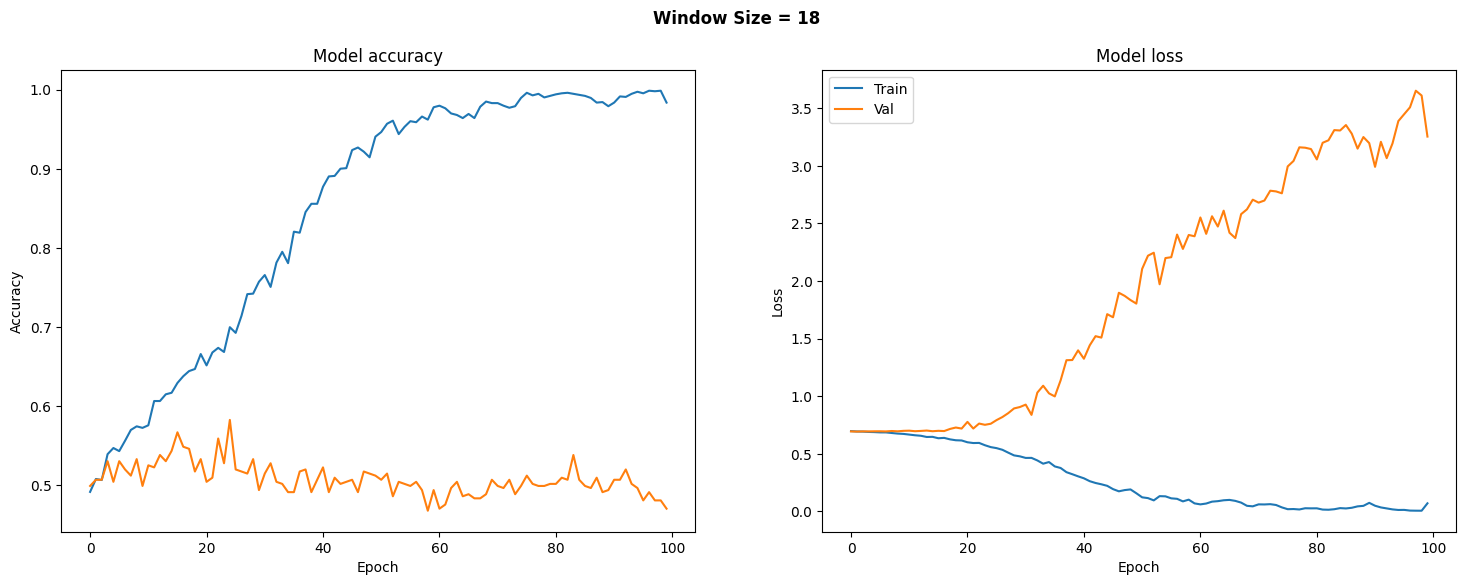

Results using a window of 20 games


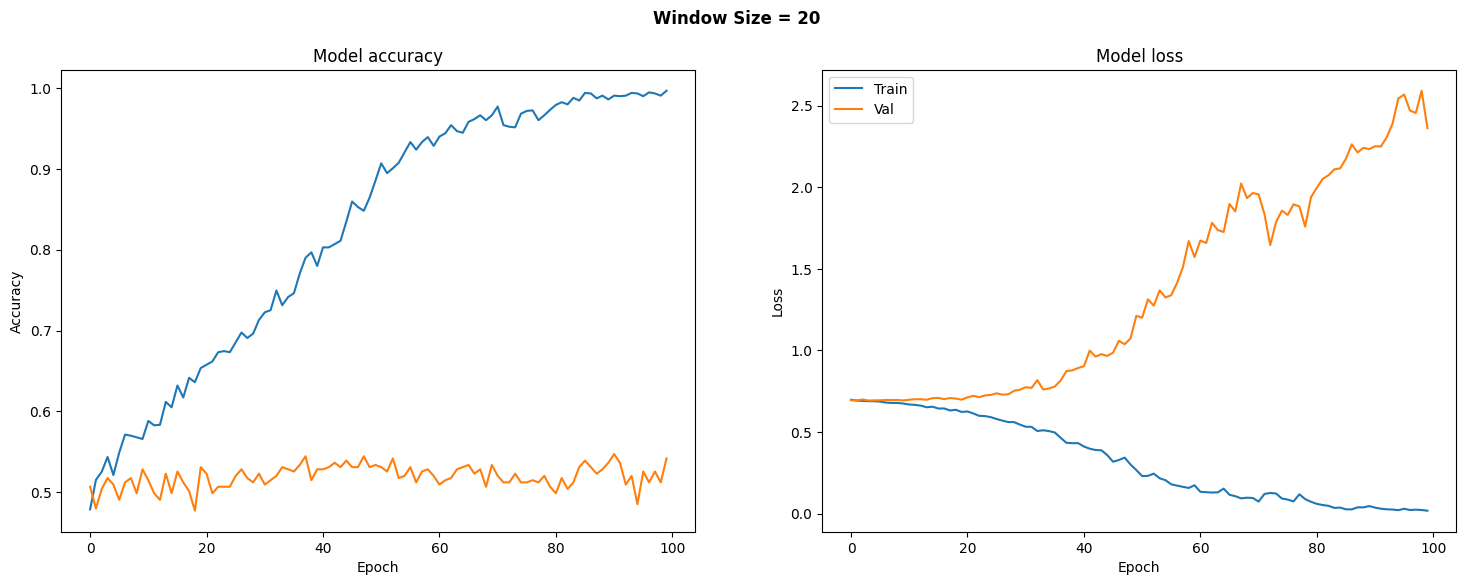

In [8]:
models = []
window_sizes = [5,10,15,18,20]
for window in window_sizes:
    window_df = pd.read_excel(f'data/train_{window}.xlsx')
    
    X = window_df.drop(columns=['Target'])
    y = window_df['Target']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X.drop(columns=['Date']))
    
    X_seq, y_seq = create_sequences(X_scaled, y, time_steps=window)
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)
    
    model = Sequential([
        LSTM(128, input_shape=(window, X_train.shape[2]), return_sequences=True),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=0)
    
    print(f'Results using a window of {window} games')
    plotHistory(window, history)
    
    models.append({'Window': window, 'Model': model})

Results using a window of 5 games


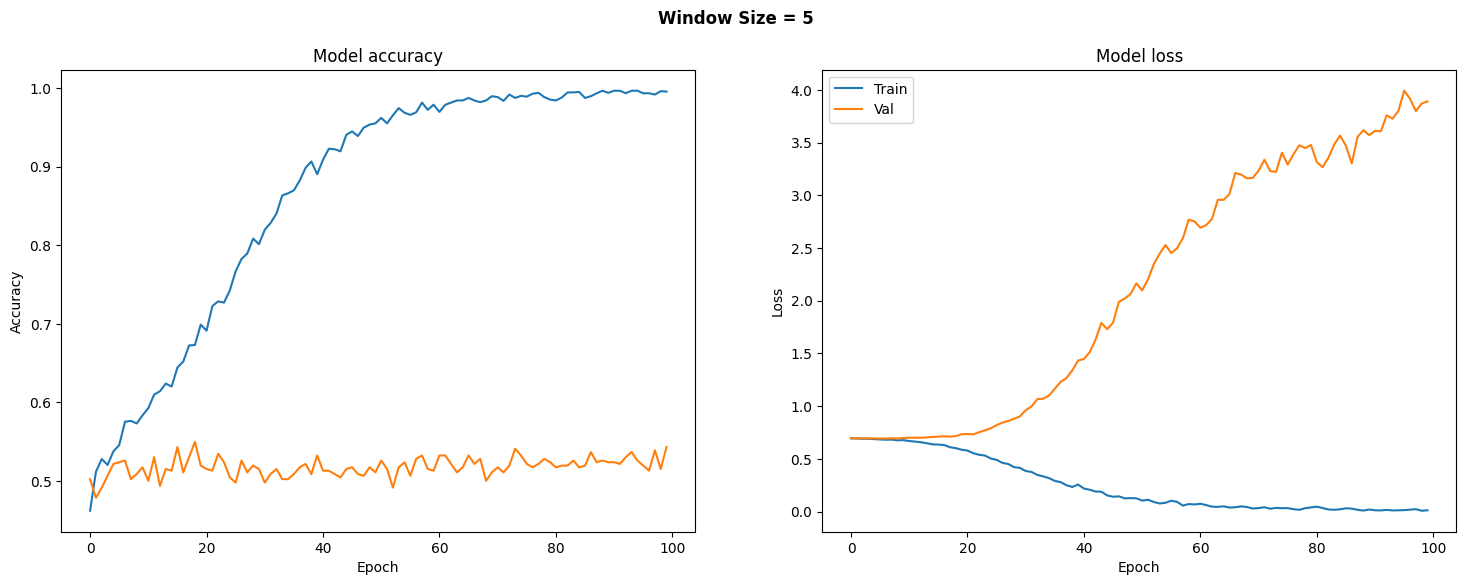

Results using a window of 10 games


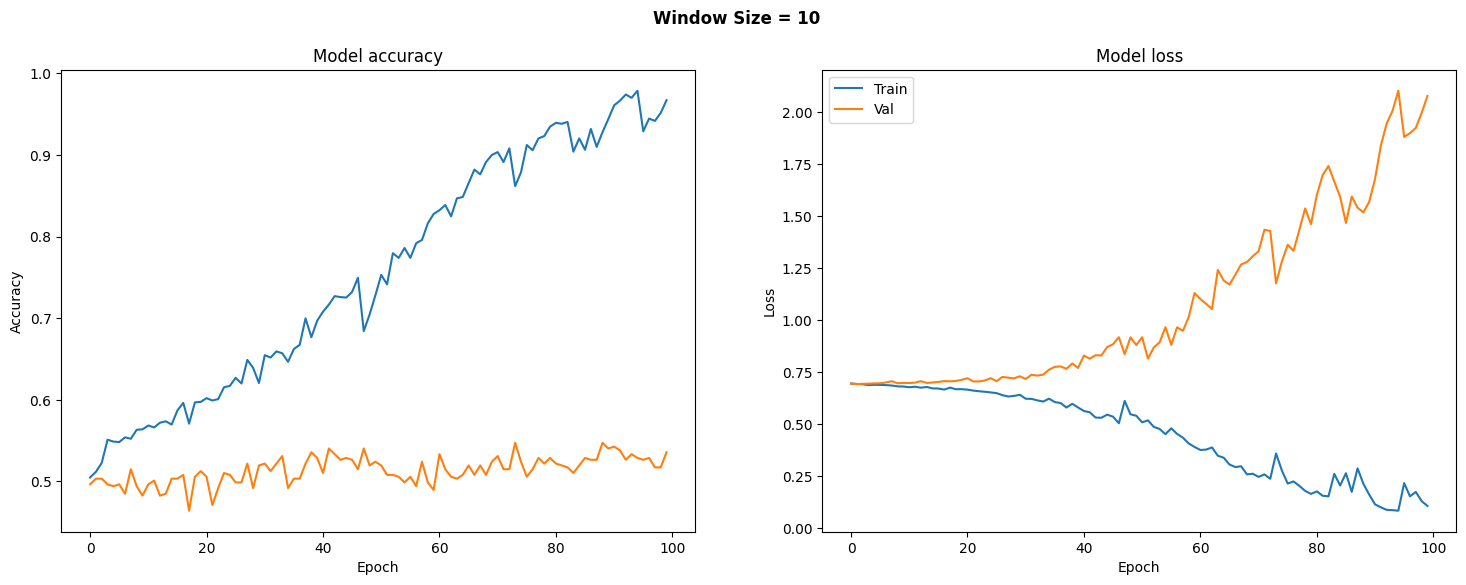

Results using a window of 15 games


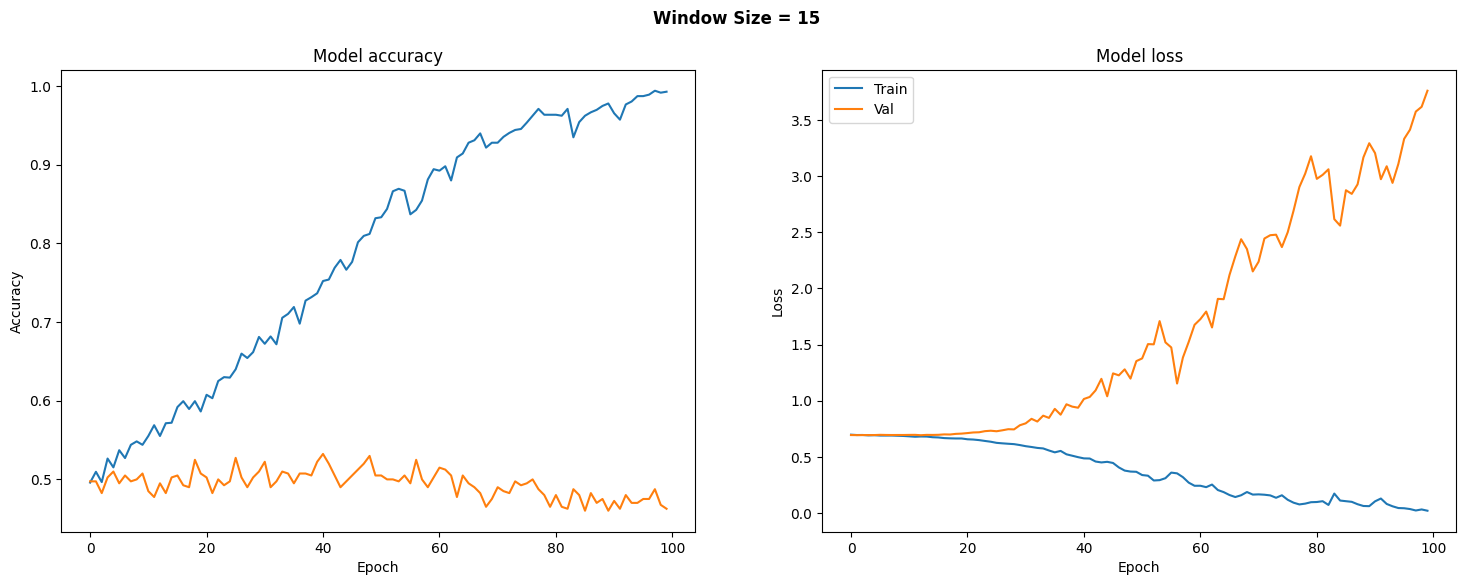

Results using a window of 18 games


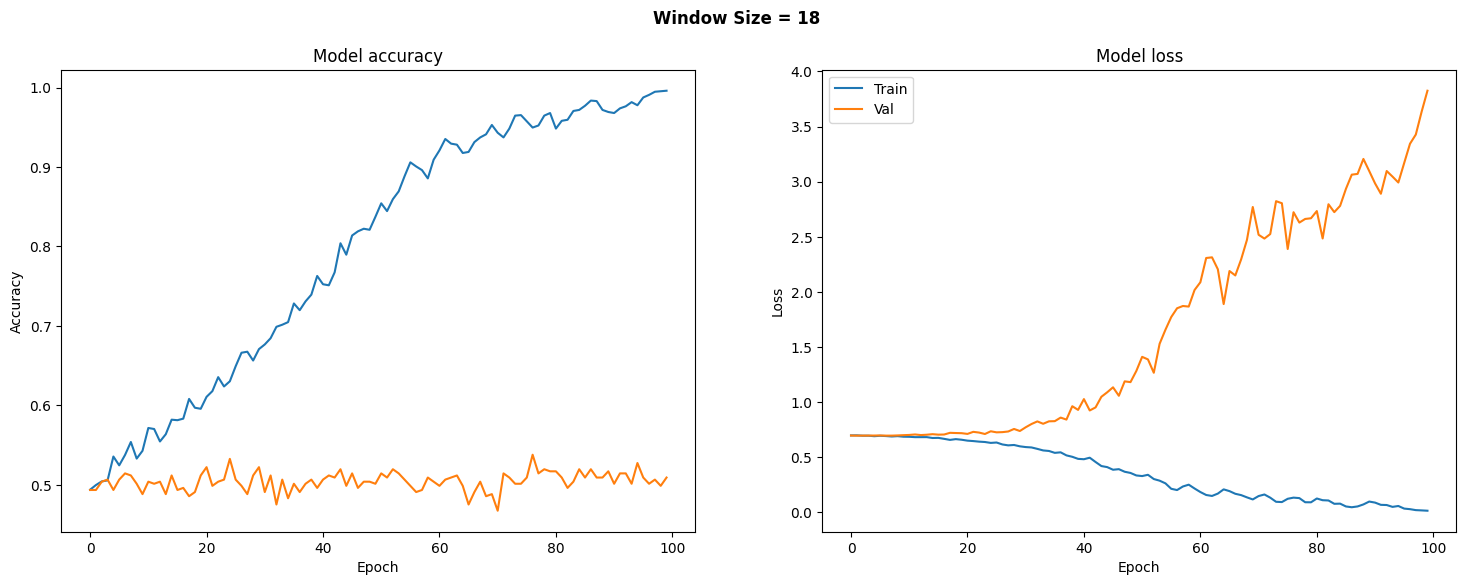

Results using a window of 20 games


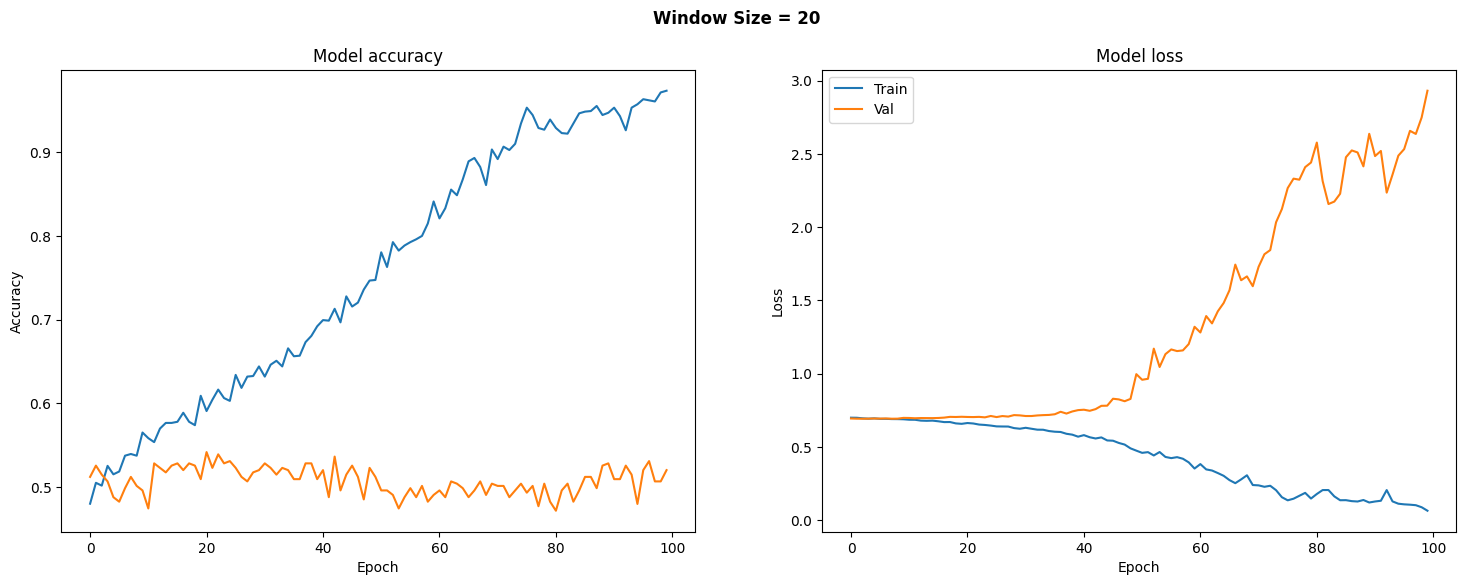

In [9]:
models2 = []
window_sizes = [5,10,15,18,20]
for window in window_sizes:
    window_df = pd.read_excel(f'data/train_{window}.xlsx')
    
    X = window_df.drop(columns=['Target'])
    y = window_df['Target']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X.drop(columns=['Date']))
    
    X_seq, y_seq = create_sequences(X_scaled, y, time_steps=window)
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)
    
    model = Sequential([
        LSTM(128, input_shape=(window, X_train.shape[2]), return_sequences=True),
        Dropout(0.5),
        LSTM(64, return_sequences=False),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=0)
    
    print(f'Results using a window of {window} games')
    plotHistory(window, history)
    
    models2.append({'Window': window, 'Model': model})

Results using a window of 5 games


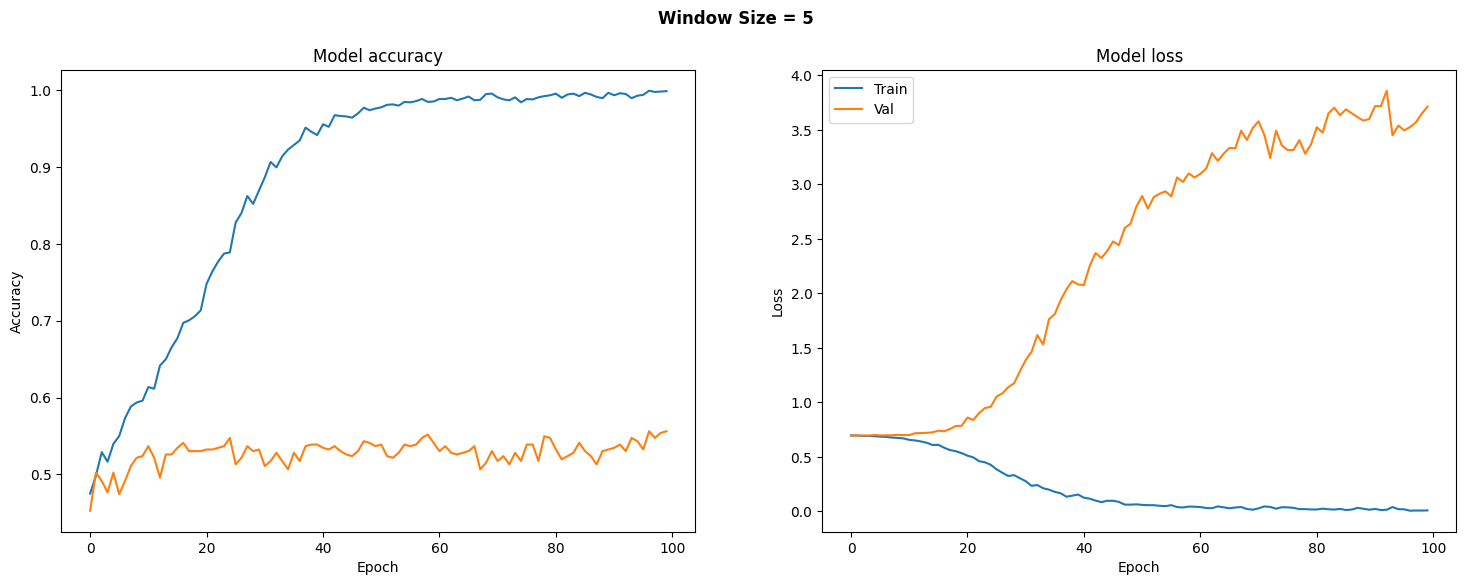

Results using a window of 10 games


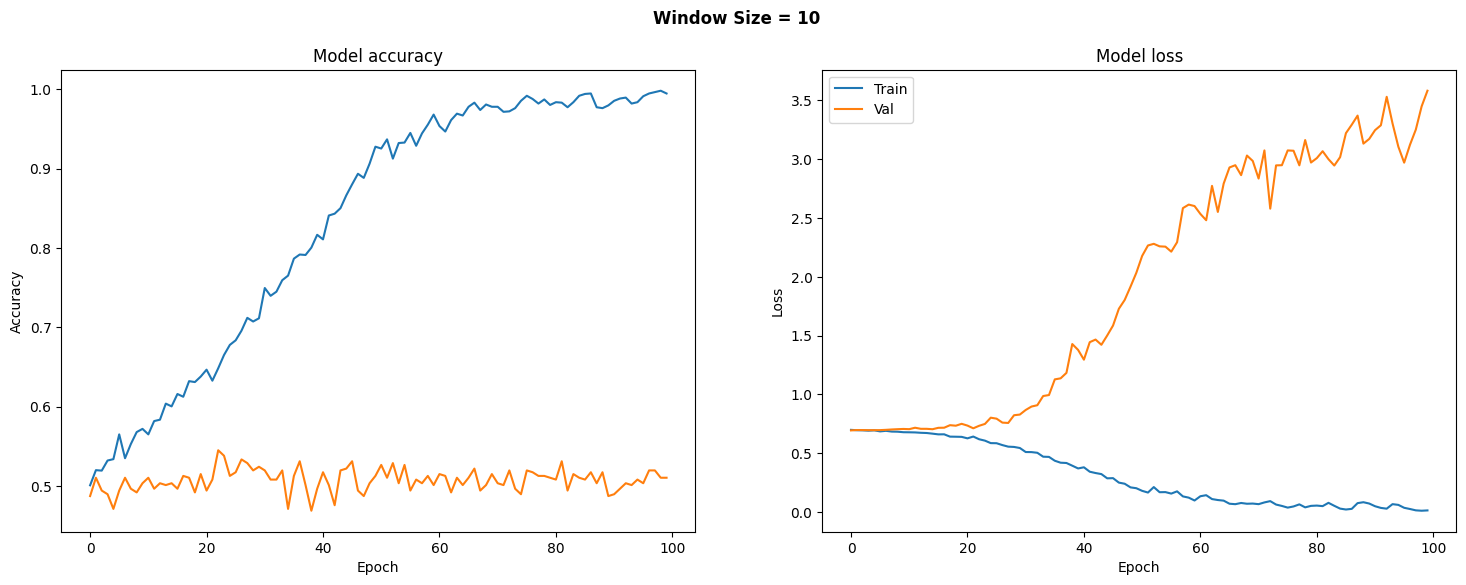

Results using a window of 15 games


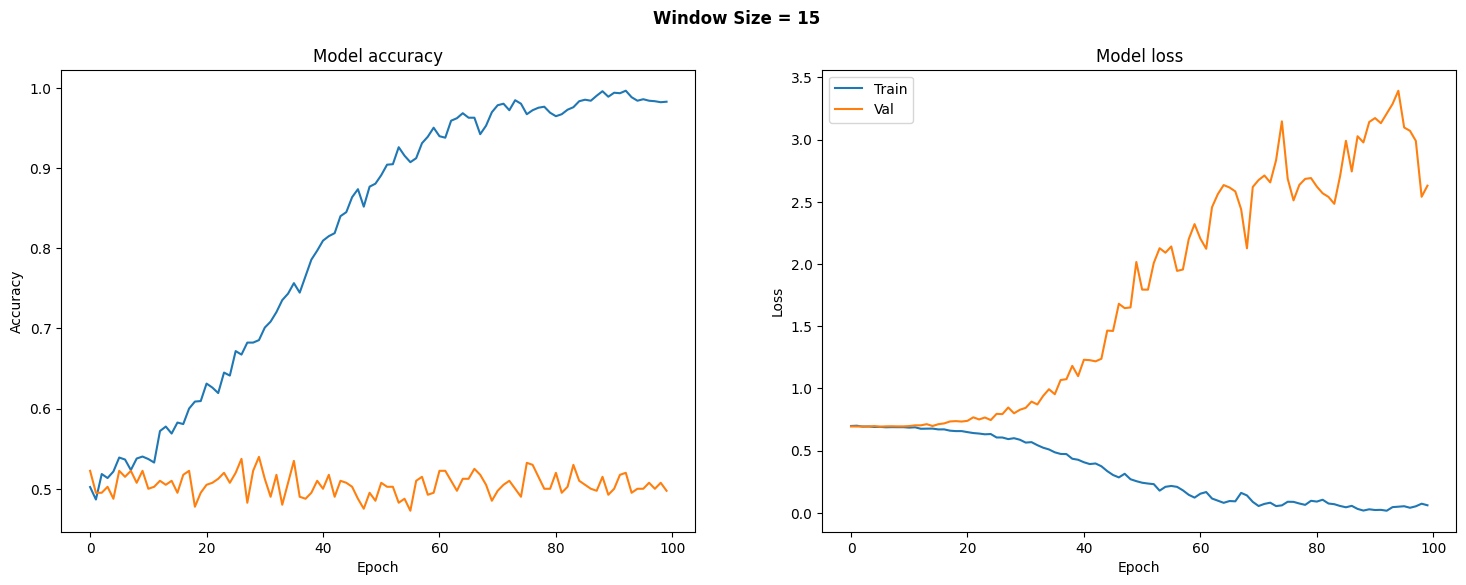

Results using a window of 18 games


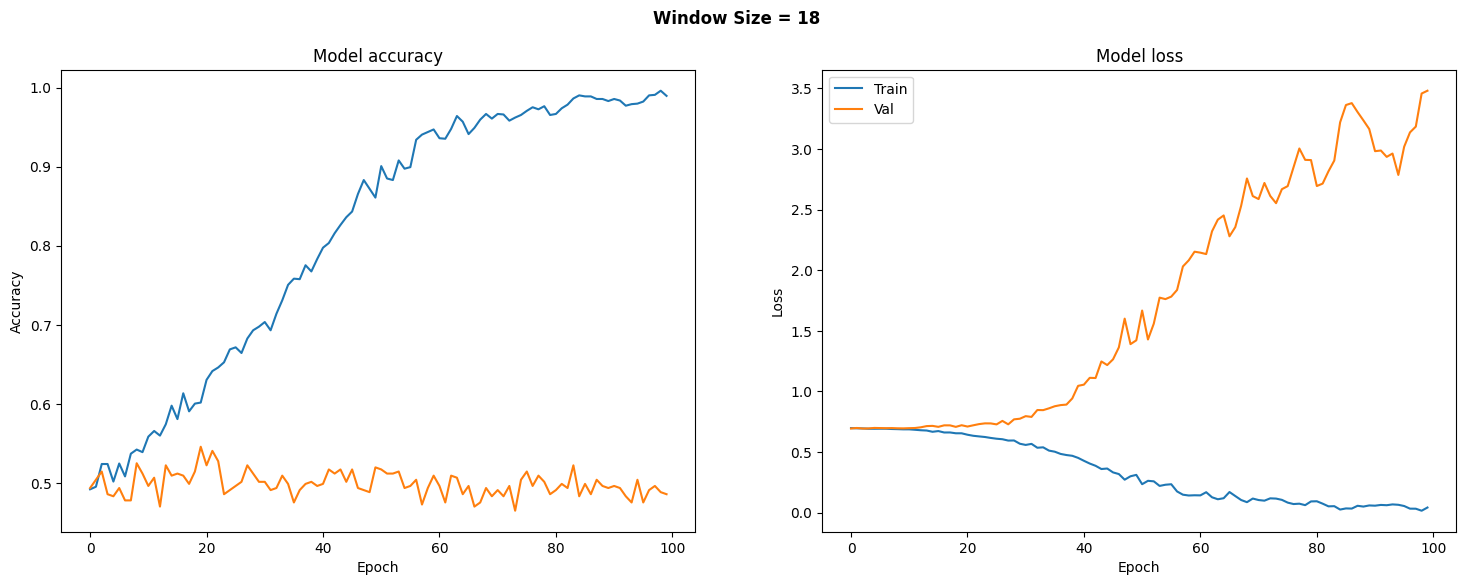

Results using a window of 20 games


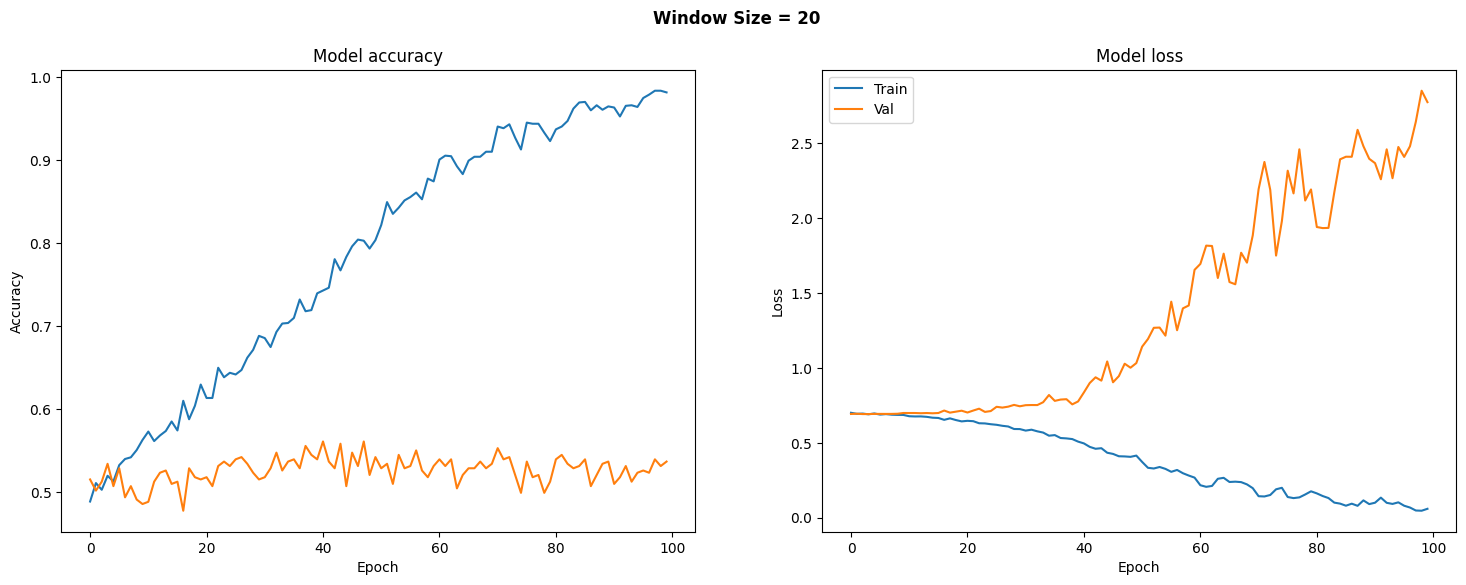

In [10]:
models3 = []
window_sizes = [5,10,15,18,20]
for window in window_sizes:
    window_df = pd.read_excel(f'data/train_{window}.xlsx')
    
    X = window_df.drop(columns=['Target'])
    y = window_df['Target']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X.drop(columns=['Date']))
    
    X_seq, y_seq = create_sequences(X_scaled, y, time_steps=window)
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)
    
    model = Sequential([
        LSTM(128, input_shape=(window, X_train.shape[2]), return_sequences=True),
        Dropout(0.5),
        LSTM(64, return_sequences=False),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    
    print(f'Results using a window of {window} games')
    plotHistory(window, history)
    
    models3.append({'Window': window, 'Model': model})

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Results using a window of 5 games


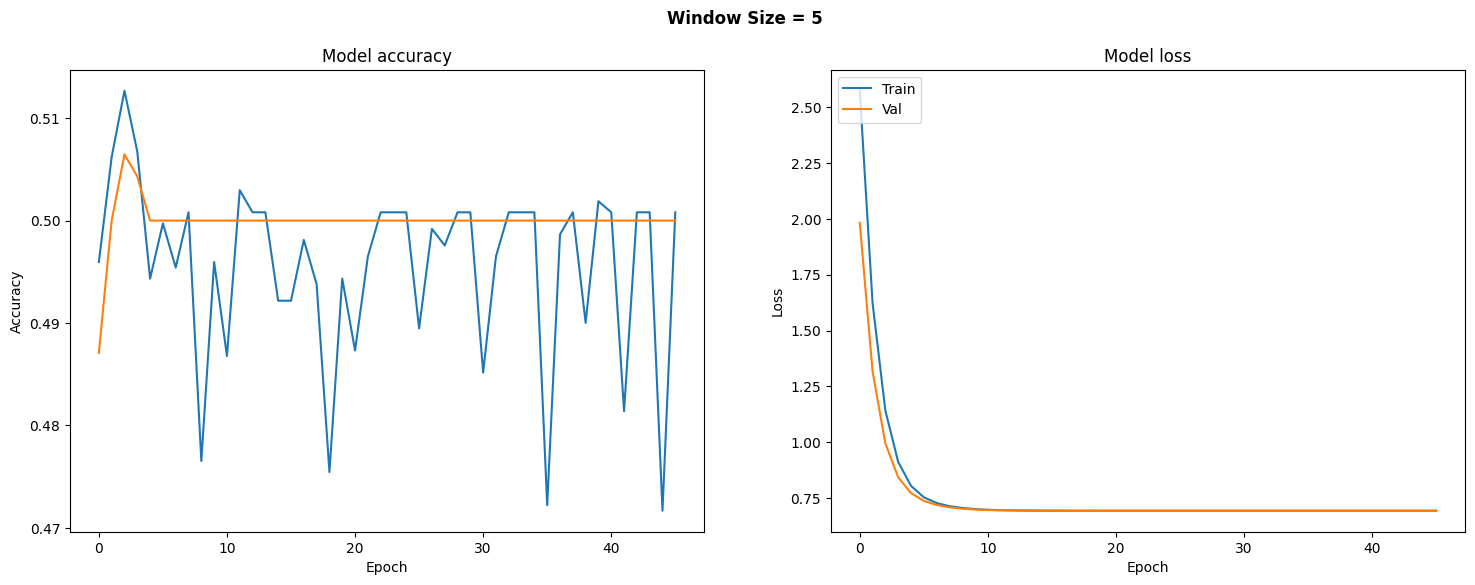

Results using a window of 10 games


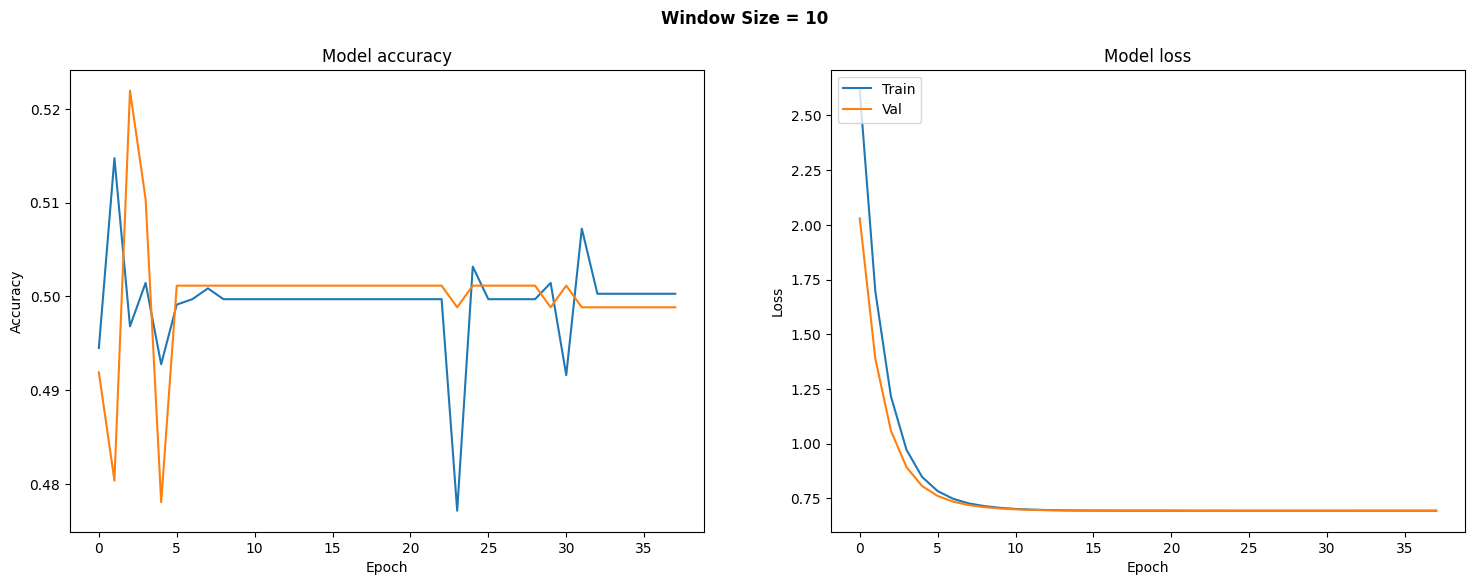

Results using a window of 15 games


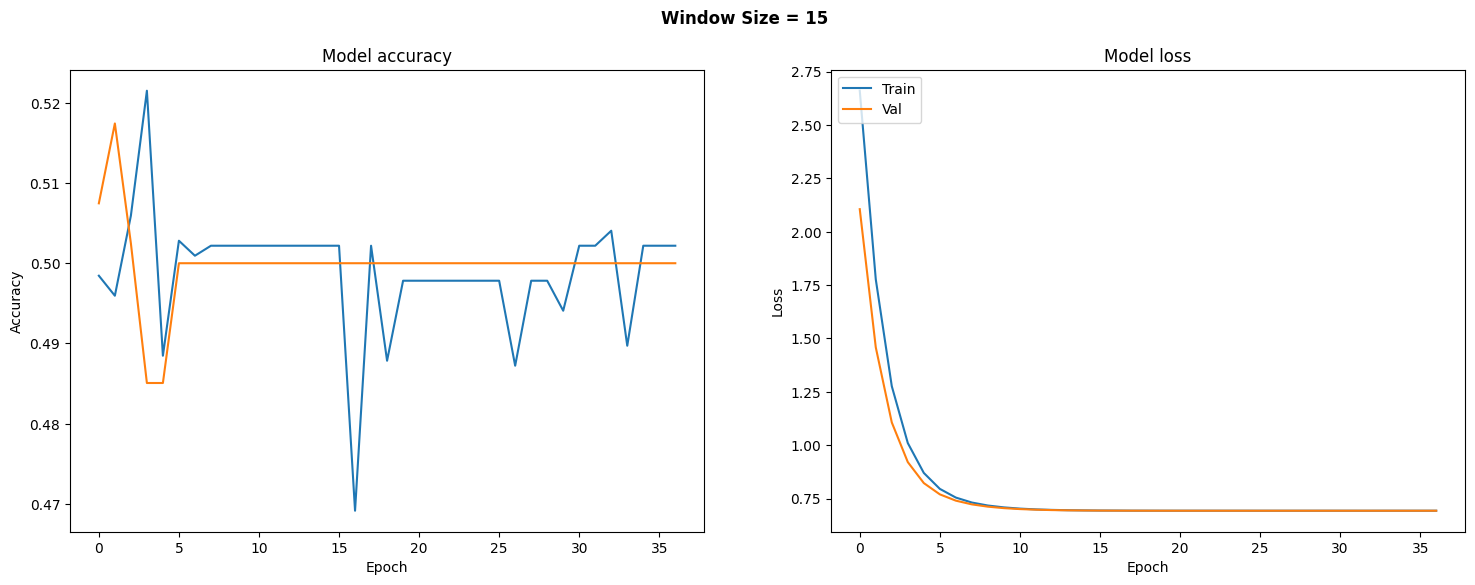

Results using a window of 18 games


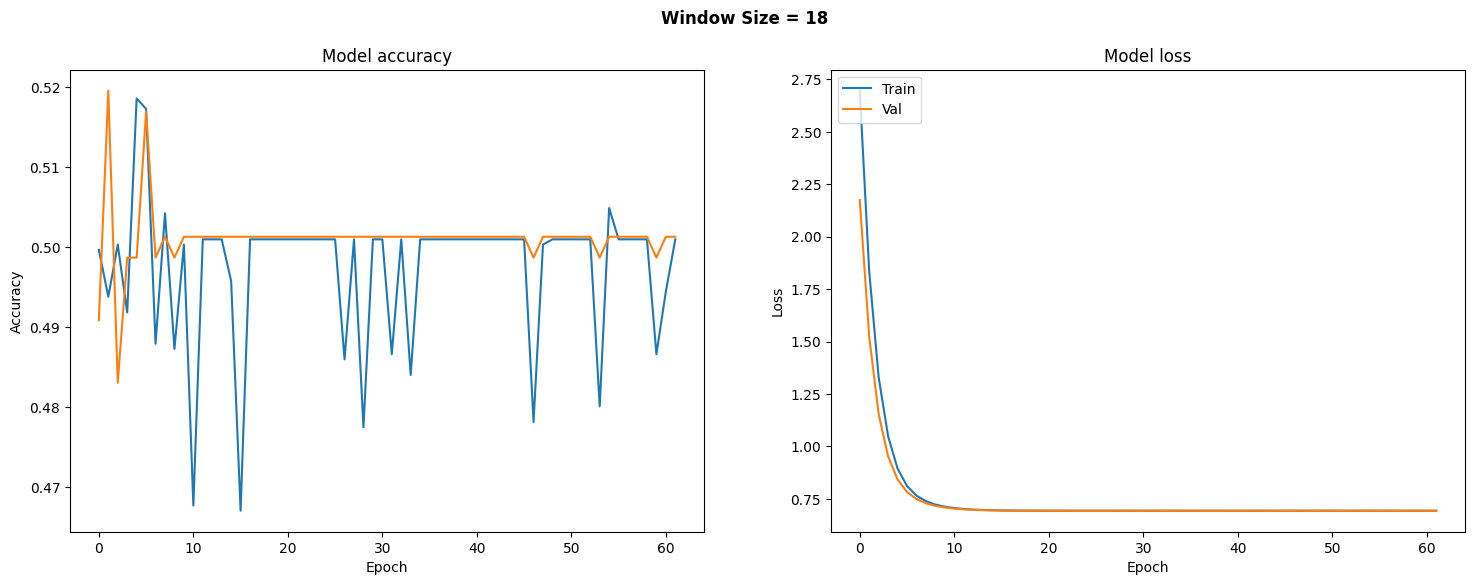

Results using a window of 20 games


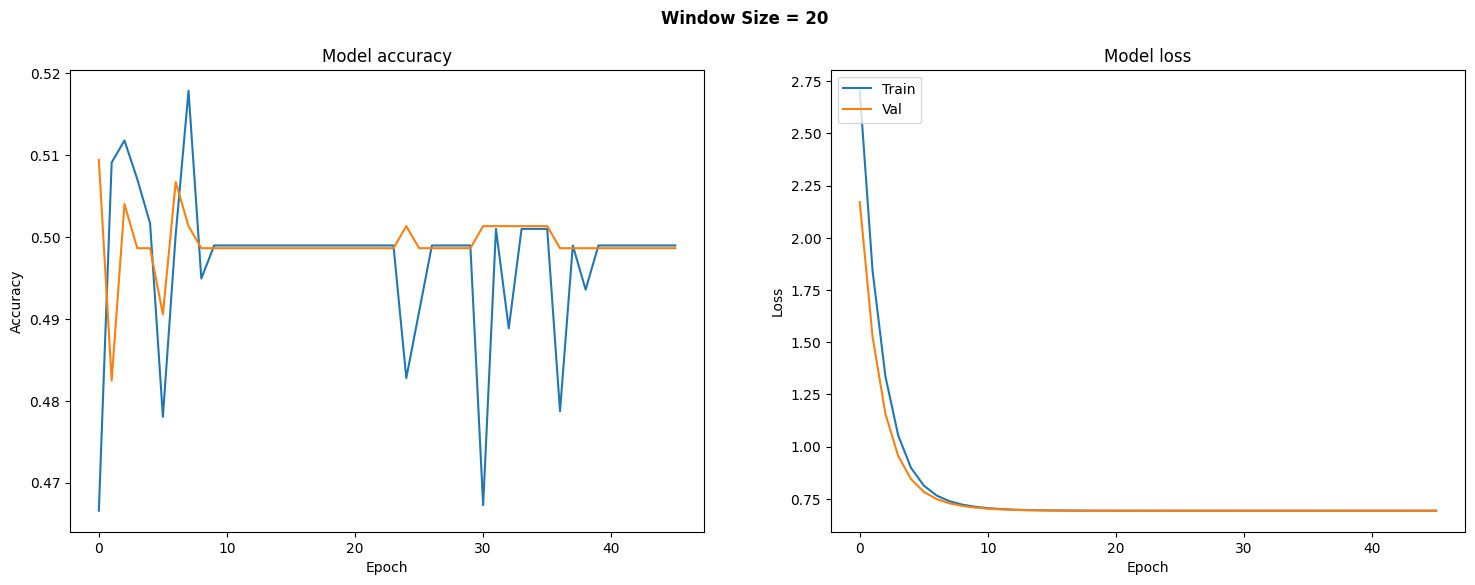

In [13]:
models4 = []
window_sizes = [5,10,15,18,20]
for window in window_sizes:
    window_df = pd.read_excel(f'data/train_{window}.xlsx')
    
    X = window_df.drop(columns=['Target'])
    y = window_df['Target']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X.drop(columns=['Date']))
    
    X_seq, y_seq = create_sequences(X_scaled, y, time_steps=window)
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)
    
    model = Sequential([
        LSTM(128, input_shape=(window, X_train.shape[2]), return_sequences=True, kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        LSTM(64, return_sequences=False, kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, batch_size=64, 
                        validation_data=(X_test, y_test), verbose=0, callbacks=[early_stopping])

    
    print(f'Results using a window of {window} games')
    plotHistory(window, history)
    
    models4.append({'Window': window, 'Model': model})

In [14]:
models_df = []
for list_idx, model_list in enumerate([models, models2, models3, models4]):
    for model in model_list:
        models_df.append({'Index': list_idx, 'Window': model['Window'], 'Model': model['Model']})
        
models_df = pd.DataFrame(models_df)

,Index,Window,Model
0,0,5,<keras.engine.sequential.Sequential object at ...
1,0,10,<keras.engine.sequential.Sequential object at ...
2,0,15,<keras.engine.sequential.Sequential object at ...
3,0,18,<keras.engine.sequential.Sequential object at ...
4,0,20,<keras.engine.sequential.Sequential object at ...
5,1,5,<keras.engine.sequential.Sequential object at ...
6,1,10,<keras.engine.sequential.Sequential object at ...
7,1,15,<keras.engine.sequential.Sequential object at ...
8,1,18,<keras.engine.sequential.Sequential object at ...
9,1,20,<keras.engine.sequential.Sequential object at ...
